In [27]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [29]:
raw_mail_data = pd.read_csv(r"C:\Users\M N Pranav Ponnanna\Email-Spam-Detection-Using-NLP\spam_ham_dataset.csv")

In [30]:
raw_mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [31]:
raw_mail_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [32]:
raw_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [33]:
raw_mail_data['Unnamed: 0'].nunique()

5171

In [34]:
mail_data = raw_mail_data[['label','text']]

In [35]:
mail_data

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [36]:
mail_data.shape

(5171, 2)

In [37]:
#  label spam mail as 0 and ham mail as 1

mail_data.loc[mail_data['label']=='spam','label',] = 0
mail_data.loc[mail_data['label']=='ham','label',] = 1

C:\Users\M N Pranav Ponnanna\AppData\Local\Temp\ipykernel_6932\850474780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_data.loc[mail_data['label']=='spam','label',] = 0
C:\Users\M N Pranav Ponnanna\AppData\Local\Temp\ipykernel_6932\850474780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_data.loc[mail_data['label']=='ham','label',] = 1


In [38]:
# Seperating data as text and label

X = mail_data['text']
y = mail_data['label']

In [39]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [40]:
print(y)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


In [41]:
# Splittig the data into training data and test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train.shape,X_test.shape

((4136,), (1035,))

In [43]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert y_train and y_test valurs as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [44]:
print(X_train_features)

  (0, 1853)	0.12748535284831225
  (0, 37040)	0.11412599930494488
  (0, 40105)	0.0408923821152219
  (0, 40384)	0.05444939094896754
  (0, 5441)	0.13197857231749044
  (0, 12046)	0.0839055140378158
  (0, 41554)	0.10320363165033816
  (0, 2788)	0.1256016252665944
  (0, 12946)	0.11509266044301701
  (0, 26122)	0.07779085348850356
  (0, 12479)	0.06491163103766874
  (0, 25096)	0.04553157073433694
  (0, 25872)	0.04938970084422244
  (0, 39781)	0.07803917520085726
  (0, 23112)	0.05502672675222555
  (0, 26021)	0.059294558668101766
  (0, 29215)	0.048966659688614786
  (0, 16519)	0.10921937700473738
  (0, 7754)	0.16746553986379242
  (0, 26133)	0.06654381900817134
  (0, 34370)	0.11719848871786094
  (0, 36775)	0.0674885831736639
  (0, 39247)	0.13197857231749044
  (0, 10063)	0.13197857231749044
  (0, 34907)	0.14725900406532114
  :	:
  (4135, 50)	0.051342057554910434
  (4135, 70)	0.05786352830846693
  (4135, 761)	0.06432867811359633
  (4135, 32291)	0.09124412794447358
  (4135, 0)	0.25277042801849897
  (413

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [47]:
# Prediction

y_pred_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train,y_pred_on_training_data)

print("Accuracy on Training data: ",accuracy_on_training_data)

Accuracy on Training data:  0.9961315280464217


In [48]:
y_pred_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test,y_pred_on_test_data)

print("Accuracy on Test data: ", accuracy_on_test_data)

Accuracy on Test data:  0.9893719806763285


In [57]:
input_mail = ["Subject: looking for medication ? we ` re the best source ."]

input_data_features = feature_extraction.transform(input_mail)

prediction = model.predict(input_data_features)
prediction

array([0])

In [58]:
if(prediction[0]==1):
    print('Genuine mail')
else:
    print('Spam mail')
    

Spam mail


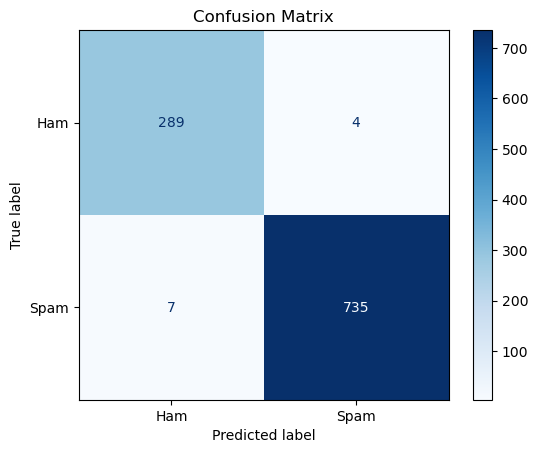

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_on_test_data)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
